In [3]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unp
from uncertainties import ufloat


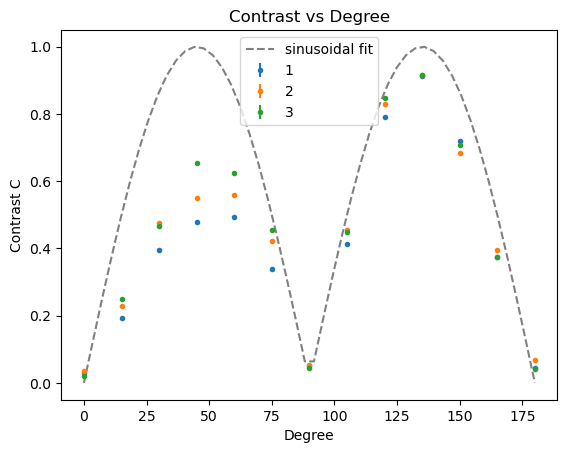

In [10]:
deg, Vmax1, Vmin1 = np.genfromtxt("data/contrast1.txt", unpack=True)
Vmax2, Vmin2 = np.genfromtxt("data/contrast2.txt", usecols=(1,2),unpack=True)
Vmax3, Vmin3 = np.genfromtxt("data/contrast3.txt", usecols=(1,2),unpack=True)

Vmax1_err = np.ones(len(Vmax1))*0.1*Vmax1
Vmin1_err = np.ones(len(Vmin1))*0.1*Vmin1
Vmax2_err = np.ones(len(Vmax2))*0.1*Vmax2
Vmin2_err = np.ones(len(Vmin2))*0.1*Vmin2
Vmax3_err = np.ones(len(Vmax3))*0.1*Vmax3
Vmin3_err = np.ones(len(Vmin3))*0.1*Vmin3

V_max1 = [ufloat(val, err) for val, err in zip(Vmax1, Vmax1_err)]
V_min1 = [ufloat(val, err) for val, err in zip(Vmin1, Vmin1_err)]
V_max2 = [ufloat(val, err) for val, err in zip(Vmax2, Vmax2_err)]
V_min2 = [ufloat(val, err) for val, err in zip(Vmin2, Vmin2_err)]
V_max3 = [ufloat(val, err) for val, err in zip(Vmax3, Vmax3_err)]
V_min3 = [ufloat(val, err) for val, err in zip(Vmin3, Vmin3_err)]

C1 = np.abs((Vmax1 - Vmin1) / (Vmax1 + Vmin1))
C2 = np.abs((Vmax2 - Vmin2) / (Vmax2 + Vmin2))
C3 = np.abs((Vmax3 - Vmin3) / (Vmax3 + Vmin3))


plt.errorbar(deg, unp.nominal_value(C1), yerr=unp.std_dev(C1), fmt=".", label="1")
plt.errorbar(deg, unp.nominal_value(C2), yerr=unp.std_dev(C1), fmt=".", label="2")
plt.errorbar(deg, unp.nominal_value(C3), yerr=unp.std_dev(C1), fmt=".", label="3")
plt.plot(np.linspace(0,180), np.abs(np.sin(2*np.radians(np.linspace(0,180)))), color="gray", linestyle="dashed", label="sinusoidal fit")
plt.xlabel("Degree")
plt.ylabel("Contrast C")
plt.title("Contrast vs Degree")
plt.legend()


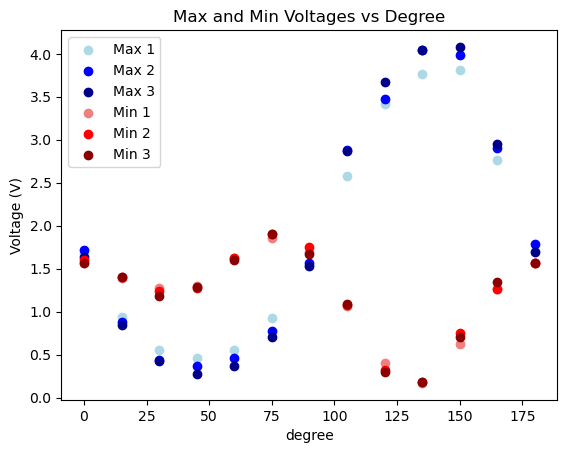

In [11]:
plt.scatter(deg, Vmax1, color="lightblue", label="Max 1")
plt.scatter(deg, Vmax2, color="blue", label="Max 2")
plt.scatter(deg, Vmax3, color="darkblue", label="Max 3")

plt.scatter(deg, Vmin1, color="lightcoral", label="Min 1")
plt.scatter(deg, Vmin2, color="red", label="Min 2")
plt.scatter(deg, Vmin3, color="darkred", label="Min 3")

plt.xlabel("degree")
plt.ylabel("Voltage (V)")
plt.title("Max and Min Voltages vs Degree")
plt.legend()

In [18]:
counts = np.genfromtxt("data/glass.txt", unpack=True)
meancount = np.mean(counts)
mean_dev = np.std(counts)/np.sqrt(len(counts))

print(f"Mean counts: {meancount} ± {mean_dev}")

lambda0 = 632.99e-9
d = 1e-3
theta = np.radians(10)
theta0 = np.radians(10)
M = meancount
n_glass = 1 / (1 - (M * lambda0) / (1 * d * (theta**2+theta0**2)))
print(f"Refractive index of glass: {n_glass}")

Mean counts: 31.083333333333332 ± 0.8453987663074002
Refractive index of glass: 1.4770029529039566


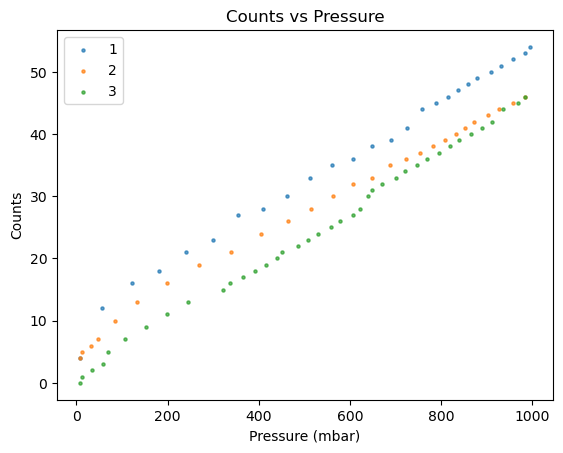

In [7]:
p1, c1 = np.genfromtxt("data/air1.txt", unpack=True)
p2, c2 = np.genfromtxt("data/air2.txt", unpack=True)
p3, c3 = np.genfromtxt("data/air3.txt", unpack=True)

plt.scatter(p1, c1, alpha=0.7, s=5,label="1")
plt.scatter(p2, c2, alpha=0.7, s=5,label="2")
plt.scatter(p3, c3, alpha=0.7, s=5,label="3")
plt.xlabel("Pressure (mbar)")
plt.ylabel("Counts")
plt.title("Counts vs Pressure")
plt.legend()